## Authors: Tom Genlis - Bastien Pouessel - SCIA 2024

# EGC 2024 - Jeu de données Bitcoin

Welcome to our PYBD Jupyter Notebook submission. In this notebook, we will analyze the given dataset (EGC 2024 - Bitcoin Dataset) to reveal hidden facts and intricate relationships within the data that are not readily apparent.

## $I.$ Importing Librairies

In [1]:
# If you don't have the dependencies
# !pip install networkx plotly==5.14.1 numpy scipy pandas matplotlib seaborn

We need to import useful librairies
 - **numpy** : maths
 - **pandas** : data manipulation as tables
 - **matplotlib, seaborn** : static graph display
 - **plotly** : dynamic graph display
 - **glob, os** : file manipulation
 - **networkx** : graph maths

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import dateutil.parser
import os
import networkx as nx
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
sns.set()
%matplotlib inline
pd.options.plotting.backend = "plotly"
pd.set_option('display.max_columns', None) # display all columns

## $II.$ EDA (Exploratory Data Analysis)

In this part will we be focusing on exploring the given dataset to ensure a great understanding of what we will be working with. The data used in this project is from the following website: https://github.com/Yquetzal/DefiEGC2024

### $II.A.$ Loading data

First, data is loaded from the csv files and converted to a pandas dataframe. The data is then cleaned and converted to the correct data type.
1. Check types of data
2. Handle missing values
3. Treat the null values and duplicates

- Time Series
    - **df_global** - contains the number of transactions, payments, blocks, received and sent satoshis, fee statistics, miners reward, created coins, auto transaction
    - **df_actors** - data on 100 most active actors (per activity day) such as its identity, data on received and spent satoshis, data of fee paid, auto transactions
    - **df_external** - bitcoin price (USD) and hash rate

- Transaction Networks
    - **df_network** - network of transactions per day in the format source actor, target actor, total value and number of transactions

### $II.B.$ Global dataset

This dataset contains information about the Bitcoin blockchain from 2015 to 2017.

In [4]:
# Load the CSV using Pandas
# 'parse_dates' parameter is used to convert the index to datetime. Otherwise, the index is treated as an object.
df_global = pd.read_csv('DefiEGC2024/timeseries/global.csv', index_col=0, parse_dates=True)

In [5]:
df_global.shape

(912, 19)

In [6]:
df_global.head()

,year,month,day,total_fee,total_received_satoshi,total_sent_satoshi,mean_fee_satoshi,mean_feeUSD,mean_fee_for100,nb_transactions,nb_payments,mean_nb_inputs,mean_nb_outputs,nb_mining,total_mining_satoshi,newly_created_coins,self_spent_satoshi,total_received,volume_without_self
2015-01-01,2015,1,1,801373971,45473028339385,45058028339385,13609.829337,4.284054e+06,0.799999,58882,161194,2.595241,2.737577,166,415801373971,415000000000,2757774885900,45473028339385,42715253453485
2015-01-02,2015,1,2,1159934218,73370568521080,72955568521080,14978.682808,4.732406e+06,0.778933,77439,257633,2.715557,3.326915,166,416159934218,415000000000,4316724676318,73370568521080,69053843844762
2015-01-03,2015,1,3,1196476043,82635189454578,82220189454578,14304.385766,4.086009e+06,0.797419,83644,295618,2.781885,3.534240,166,416196476043,415000000000,5584584356557,82635189454578,77050605098021
2015-01-04,2015,1,4,2159195328,115159442449532,114726942449532,25138.199015,6.619757e+06,0.899054,85893,280288,2.770133,3.263223,173,434659195328,432500000000,6554587956125,115159442449532,108604854493407
2015-01-05,2015,1,5,1608443040,112439228285641,112051728285641,16955.609622,4.662858e+06,0.898594,94862,286552,2.954471,3.020725,155,389108443040,387500000000,5063695492444,112439228285641,107375532793197


Let's check data types.

In [7]:
df_global.index.dtype # <M8[ns] is a datetime format

dtype('<M8[ns]')

In [8]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 912 entries, 2015-01-01 to 2017-06-30
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    912 non-null    int64  
 1   month                   912 non-null    int64  
 2   day                     912 non-null    int64  
 3   total_fee               912 non-null    int64  
 4   total_received_satoshi  912 non-null    int64  
 5   total_sent_satoshi      912 non-null    int64  
 6   mean_fee_satoshi        912 non-null    float64
 7   mean_feeUSD             912 non-null    float64
 8   mean_fee_for100         912 non-null    float64
 9   nb_transactions         912 non-null    int64  
 10  nb_payments             912 non-null    int64  
 11  mean_nb_inputs          912 non-null    float64
 12  mean_nb_outputs         912 non-null    float64
 13  nb_mining               912 non-null    int64  
 14  total_mining_satoshi   

While checking for missing values, we can see that there are no missing values in the dataset. The type of the data seems to be correct.

In [9]:
df_global.duplicated().any()

False

It seems that there are no duplicates in the dataset.

We can remove the year, month and day columns as they are not needed. The index is already a datetime object which already contains that information.

In [10]:
df_global.drop(columns=["year", "month", "day"], inplace=True)

We can repeat the same steps for the other datasets.

### $II.C.$ External dataset

This dataset contains a time series of the price of Bitcoin from 2015 to 2017.

In [11]:
df_external = pd.read_csv("DefiEGC2024/timeseries/external.csv", usecols=['date', 'PriceUSD', 'HashRate'], index_col="date", parse_dates=True)

In [12]:
df_external.shape

(911, 2)

In [13]:
df_external.head()

,PriceUSD,HashRate
date,,
2015-01-02,315.942732,333345.017260
2015-01-03,285.647310,327284.198765
2015-01-04,263.334575,347486.927083
2015-01-05,275.003852,315162.561773
2015-01-06,287.549521,319203.107437


In [14]:
df_external.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 911 entries, 2015-01-02 to 2017-06-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PriceUSD  911 non-null    float64
 1   HashRate  911 non-null    float64
dtypes: float64(2)
memory usage: 21.4 KB


In [15]:
df_external.duplicated().any()

False

Same observations as for the global dataset. No missing values, no duplicates and correct data types.

### $II.D.$ Actors dataset

This dataset contains information about the 100 most active actors trading activities during 2015 to 2017.

In [16]:
df_actors = pd.read_csv("DefiEGC2024/timeseries/blockchain_by_actor.csv", index_col=0)

In [17]:
df_actors.shape

(90403, 15)

In [18]:
df_actors.head()

,year,month,day,identity,received,nb_received,date,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent
0,2015.0,1.0,1.0,HappyCoins.com,1.377590e+09,4.0,2015-01-01,49596.0,0.004957,4.0,1.277500e+09,0.0,0.0,8.0,1.277500e+09
1,2015.0,1.0,1.0,821,2.476057e+09,5.0,2015-01-01,10000.0,0.000851,1.0,1.174552e+09,0.0,0.0,2.0,1.174552e+09
2,2015.0,1.0,1.0,FortuneJack.com,1.201470e+08,29.0,2015-01-01,83000.0,0.194670,11.0,1.541127e+08,14158970.0,14158970.0,22.0,1.399538e+08
3,2015.0,1.0,1.0,396,1.906135e+10,70.0,2015-01-01,540000.0,0.023738,54.0,1.842989e+10,0.0,0.0,108.0,1.842989e+10
4,2015.0,1.0,1.0,SatoshiMines.com,7.401319e+08,193.0,2015-01-01,740000.0,0.447934,45.0,1.813624e+09,35044568.0,35044568.0,84.0,1.778579e+09


In [19]:
df_actors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90403 entries, 0 to 90402
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  90403 non-null  float64
 1   month                 90403 non-null  float64
 2   day                   90403 non-null  float64
 3   identity              90403 non-null  object 
 4   received              90403 non-null  float64
 5   nb_received           90403 non-null  float64
 6   date                  90403 non-null  object 
 7   sum_fee               90403 non-null  float64
 8   mean_fee_for100       90403 non-null  float64
 9   nb_transactions       90403 non-null  float64
 10  sent                  90403 non-null  float64
 11  self_spent            90403 non-null  float64
 12  self_spent_estimated  90403 non-null  float64
 13  nb_spent              90403 non-null  float64
 14  spent                 90403 non-null  float64
dtypes: float64(13), obj

In [20]:
df_actors.duplicated().any()

False

Same observations as for the global dataset. No missing values, no duplicates and correct data types. We can also drop the year, month and day columns.

In [21]:
df_actors.drop(columns=["year", "month", "day"], inplace=True)

### $II.E.$ Network dataset

Finally, we can check the network dataset. It is a bit different as it is a network of transactions per day in the format source actor, target actor. It's split into multiple files, one per day, this is the reason we need to concatenate them.

In [22]:
def build_network_df(path : str) -> pd.DataFrame:
    """
    Build the network dataframe from the csv files. Indexes are datetime.
    :return: Unified dataframe of the network with all the data
    """
    dfs = [] # List of all the dataframes

    for file_path in glob.glob(path):
        date = os.path.splitext(os.path.basename(os.path.normpath(file_path)))[0]
        date = dateutil.parser.parse(date)

        df_temp = pd.read_csv(file_path)
        df_temp['date'] = date
        # set index to be date and hour
        df_temp.set_index(['date'], inplace=True)
        dfs.append(df_temp)

    df_network = pd.concat(dfs, axis=0)

    df_network["Source"] = df_network["Source"].astype(pd.StringDtype())
    df_network["Target"] = df_network["Target"].astype(pd.StringDtype())

    return df_network

In [23]:
df_network = build_network_df("DefiEGC2024/networks/*")

In [24]:
df_network.head()

,Source,Target,value,nb_transactions
date,,,,
2015-01-01,ePay.info_CoinJoinMess,CloudBet.com,3519173,1
2015-01-01,Cex.io,1956,8491196,3
2015-01-01,157228,C-Cex.com,10833480021,1
2015-01-01,0,421,27123449,8
2015-01-01,BTCGuild.com,787953,2507884460,1


It's a huge table.

In [25]:
df_network.shape

(5876734, 4)

In [26]:
df_network.index.dtype

dtype('<M8[ns]')

At this point, we can check for missing values, duplicates and correct data types. We are ready to start to understand the data.

## $III.$ Feature understanding

We can now start to understand the data and ask questions about it. First, we can check distribution of the features in the global dataset.

<AxesSubplot:xlabel='total_mining_satoshi', ylabel='Density'>

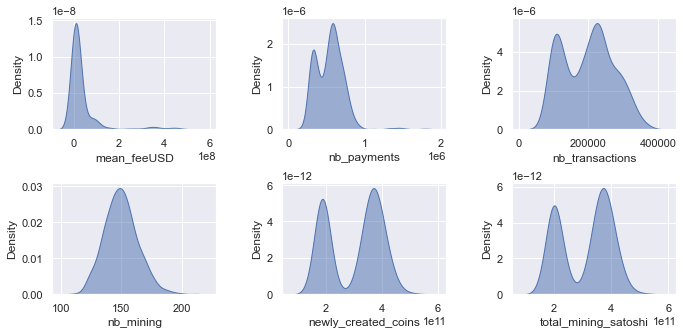

In [27]:
fig, ax = plt.subplots(2, 3, figsize=(10, 5))
fig.tight_layout(pad=3.0)
sns.kdeplot(df_global["mean_feeUSD"], fill=True, alpha=0.5, ax = ax[0, 0])
sns.kdeplot(df_global["nb_payments"], fill=True, alpha=0.5, ax = ax[0, 1])
sns.kdeplot(df_global["nb_transactions"], fill=True, alpha=0.5, ax = ax[0, 2])
sns.kdeplot(df_global["nb_mining"], fill=True, alpha=0.5, ax = ax[1, 0])
sns.kdeplot(df_global["newly_created_coins"], fill=True, alpha=0.5, ax = ax[1, 1])
sns.kdeplot(df_global["total_mining_satoshi"], fill=True, alpha=0.5, ax = ax[1, 2])

Features like newly_created_coins and total_mining_satoshi are highly correlate and describe the same thing. It can be verified with a correlation matrix.

In [28]:
corr = df_global.corr()

<AxesSubplot:>

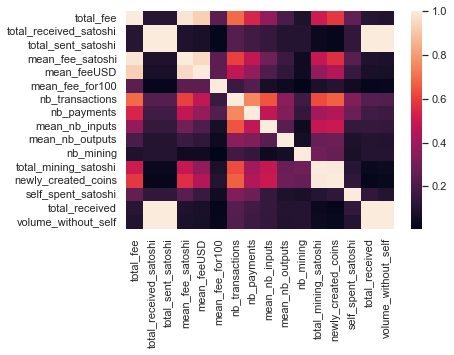

In [29]:
sns.heatmap(np.abs(corr))

Besides, we can take a look at the timeseries of the external dataset.

In [30]:
df_external.plot(title="External dataset Price and Hash rate")
fig = make_subplots(rows=2, cols=1, x_title="Date", shared_xaxes=True, subplot_titles=("Price USD", "Hash rate"))

fig.add_trace(
    go.Scatter(x=df_external.index, y=df_external["PriceUSD"], name="PriceUSD"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=df_external.index, y=df_external["HashRate"], name="Hash rate"),
    row=2, col=1
)

fig.update_layout(title_text="Timeseries of external dataset", height=800)

Exploring the actors dataset, we can see that there are 3 types of actors: miners, identified actors and unidentified actors. The plot of the PriceUSD show the uptrend of the bitcoin price. The plot of the HashRate shows the increase of the hash rate of the network. The correlation matrix and the kdeplot show that the number of transactions and the number of payments are highly correlated. The number of mining is also highly correlated with the number of transactions. The goal of this analysis was to understand the data and the different features in addition of the description on the github. 

## $IV.$ Observations and questions

### $IV.A.$ Question : identification of behaviours according to their connectivity in the graph

Firstly, we start by creating a function that we can use to plot the network graph. We can use the networkx library to create the graph and plotly to plot it. Networkx is recommended in the plotly documentation. It will simplify the representation of the network. It will also give access to different metrics and algorithms that we can use to analyze the network.

### $IV.B.$ Approach : Strongly connected components

We define a function that will create the network dataframe from the network dataset. It will create a dataframe with the source actor, the target actor and the total value of the transactions between the two actors. The goal of this function is to be reusable on smaller subsets of the dataset.

The graph build in the function is directed.

The larger the edge, the larger the value of the transactions between the two actors.
The larger the node, the larger the number of transactions with different (unique) actors. It corresponds to the degree of the node. 

In [31]:
def find_start_nodes(graph):
    nodes = []
    for node in graph.nodes():
        if graph.in_degree(node) == 0:
            nodes.append(node)
    return nodes

def find_end_nodes(graph):
    nodes = []
    for node in graph.nodes():
        if graph.out_degree(node) == 0:
            nodes.append(node)
    return nodes

In [32]:
def network_plot(df : pd.DataFrame, title : str, display_node_types : bool = False) -> None:
    """
    Plot the network graph that represent the transactions between actors. The size of the edge is proportional to the total value of the transactions between the two actors.
    The size of the node is proportional to the number of transaction with different actors.
    :param df: Network dataframe to plot
    :return: None
    """

    # convert the dataframe to a nx graph
    graph = nx.from_pandas_edgelist(df, source="Source", target="Target", edge_attr="value", create_using=nx.DiGraph)

    # get the starting nodes and ending nodes according to their in / out_degree
    start_nodes = set(find_start_nodes(graph))
    end_nodes = set(find_end_nodes(graph))

    # distance matrix
    df = pd.DataFrame(index=graph.nodes(), columns=graph.nodes())
    for row, data in nx.shortest_path_length(graph):
        for col, dist in data.items():
            df.loc[row,col] = dist + 5

    # filling the NaN values with the max value (infinite distance)
    df = df.fillna(df.max().max())

    # displaying the graph as a Kamada Kawai layout to have a better display
    pos = nx.kamada_kawai_layout(graph, dist=df.to_dict())

    # creating the lists for the edges and the nodes for their adjacencies and degrees
    node_adjacency = [len(adjacency[1]) for adjacency in graph.to_undirected().adjacency()]
    node_dict = {node : len(adjacency) for node, adjacency in graph.to_undirected().adjacency()}

    # creating the edges to display
    edge_trace = []
    for edge in graph.edges(data=True):
        # line size is proportional to the value of the transaction
        size = 0.5 + edge[2]['value'] / df_group_by.value.quantile(0.95)

        # get graph coordinates from the graph layout
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]

        # display the edge as a line with an arrow
        edge_trace.append(go.Scatter(
            x=[x0, x1, None], y=[y0, y1, None],
            line=dict(width=size, color="black"),
            marker= dict(size=max(10, size * 2), symbol= "arrow-bar-up", angleref="previous", standoff= node_dict[edge[1]]/2 + 18),
            hoverinfo='none', mode="lines+markers"))

    # creating the nodes list of X and Y
    node_x = []
    node_y = []
    for node in graph.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)

    # creating the nodes trace
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='Blues',
            reversescale=False,
            opacity=1,
            size=50,
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            ),
            line_width=2,
            line_color="black",
        ),
        textposition="middle center",
    )


    # set the color of the nodes to the number of transaction with different actors (degree)
    node_adjacency = []

    for adjacency in graph.to_undirected().adjacency():
        node_adjacency.append(len(adjacency[1]))

    node_trace.marker.color = node_adjacency

    # set the color of the text to be able to be seen correctly
    text_colors = []
    for c in node_adjacency:
        t = "black"
        v = c / max(node_adjacency)
        if v > 0.5:
            t = "white"
        text_colors.append(t)
    node_trace.marker.size = list(np.array(node_adjacency) + 30)

    # set the text of the nodes to the name of the actor
    node_text = list(graph.nodes())
    node_trace.text = node_text
    node_trace.textfont.color = text_colors

    # set the symbol of the nodes to a diamond if it is a starting node, a square if it is an ending node and a circle otherwise
    if display_node_types:
        node_trace.marker.symbol = ["diamond" if g in start_nodes else "square" if g in end_nodes else "circle" for g in graph.nodes()]

    # create the figure
    fig = go.Figure(data= edge_trace + [node_trace],
                 layout=go.Layout(
                    title=title,
                    height=800,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

    fig.show()

We start by building the graph from the value of the network dataset. The graph is directed and goes from source to target. Networkx as a good integration of pandas.
Plotting the entire network graph is not a good idea because it is too big. Information is lost and the graph is not readable.

In [33]:
graph_network = nx.from_pandas_edgelist(df_network, source="Source", target="Target", edge_attr="value", create_using=nx.DiGraph)

We decided to study strongly connected components of the graph.

As a reminder:
*"In the mathematical theory of directed graphs, a graph is said to be **strongly connected** if every vertex is reachable from every other vertex. The **strongly connected components** of an arbitrary directed graph form a partition into subgraphs that are themselves strongly connected."*

In [ ]:
connected_comp = [list(comp) for comp in nx.strongly_connected_components(graph_network)]

Text(0, 0.5, 'Number of components')

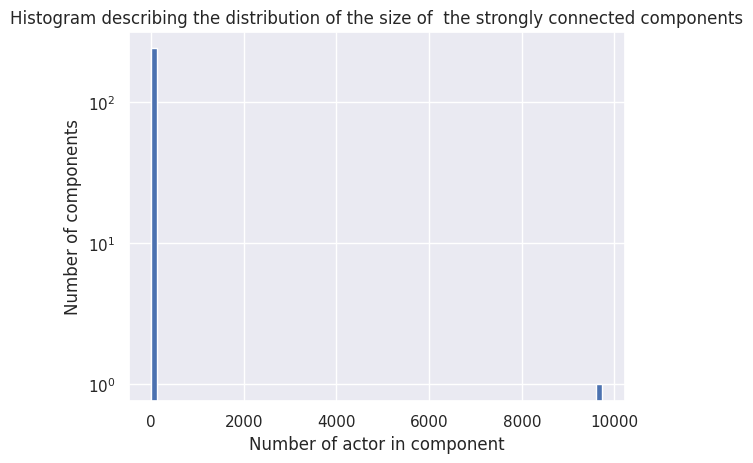

In [ ]:
plt.hist([len(comp) for comp in connected_comp], bins=80, log=True)
plt.title("Histogram describing the distribution of the size of  the strongly connected components")
plt.xlabel("Number of actor in component")
plt.ylabel("Number of components")

This histogram shows the distribution of the size of the connected components. It shows that the majority of the connected components are small. There are only one connected components that is large. It means that the network is not centralized. The rest of the components are of size mainly of size 1 and 3 components of size 2. 

The log scale is used in the y-axis of the histogram due to the difference of size between the values. 

In [ ]:
large_comp_extracted = list(filter(lambda comp: len(comp) < 3, connected_comp)) # Large component of 9700 is filtered

In [ ]:
comp_size_two = list(filter(lambda comp: len(comp) == 2, connected_comp)) # Keep components of size 2

Firstly, we decided to study the small connected compents, so we extracted the large compents that contains about 9700 actors.

Secondly, we need to flatten the list to transform it from a 2 dimensional list to 1 dimensional. (We decied not to use numpy because the array does contains same number on values on each row).

In [ ]:
connected_comp_flatten = [item for sublist in large_comp_extracted for item in sublist]

In [ ]:
len(set(connected_comp_flatten))

243

We have in total 243 strongly connected components of size 1 and 2. (240 of size 1 and 3 of size 2)

In [ ]:
def explanatory_diagram():
    with plt.xkcd():
        G = nx.DiGraph()
        G.add_edge(0, 1)
        G.add_edge(0, 2)
        G.add_edge(2, 5)
        G.add_edge(5, 6)
        G.add_edge(7, 0)
        G.add_edge(8, 7)
        G.add_edge(9, 7)
        G.add_edge(3, 4)
        G.add_edge(4, 3)

        pos = nx.planar_layout(G)
        options_central = {"edgecolors": "tab:gray", "node_size": 10000, "alpha": 1}
        options_out = {"edgecolors": "tab:gray", "node_size": 270, "alpha": 0.9}
        nx.draw_networkx_nodes(G, pos, nodelist=[0], node_color="tab:red", **options_central)
        nx.draw_networkx_nodes(G, pos, nodelist=[1, 2, 3, 4, 5, 6, 7, 8, 9], node_color="tab:blue", **options_out)
        nx.draw_networkx_edges(G, pos, edgelist=[(3,4), (4,3), (9,7), (8,7), (5,6), (2,5)], width=2, alpha=0.8, edge_color="tab:blue",)
        nx.draw_networkx_edges(G, pos, edgelist=[(0,1), (0,2), (7,0)], width=1.0, alpha=0.5)
        plt.text(-0.7, -0.35, "Main component of size 9732", fontsize=12, color='r')
        plt.text(-0.05, 0.2, "Actor that are not\nstrongly connected with\nthe main component", fontsize=12, color='b')
        plt.text(-1.1, 0.1, "Explanatory sketch\nof strongly\nconnected components", fontsize=12)
        plt.title("Explanatory sketch of strongly connected components")
        plt.draw()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

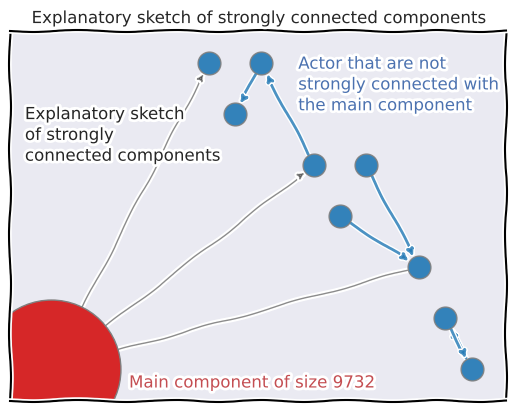

In [ ]:
explanatory_diagram()

The schema is showing that we decided to study the edges and nodes in blue, that are not part of the central strongly connected components. We decided to study this node because they are similar behavior. They are part of a chain going out of the central component or going in the central component.

In [ ]:
df_network_central_comp_removed = df_network[df_network.Source.isin(connected_comp_flatten) & df_network.Target.isin(connected_comp_flatten)]

In [ ]:
df_network_central_comp_removed.shape

(3625, 4)

We are left will 3625 transactions between the actors of this components.

We are interrested in studying the relationship between actor. We decided to groupby the value by Source and Target, in order to redruce the number of transaction and to improve the visibility on a plot. At the end the value is corresponding to the total amout exchanged between the two actors.

In [ ]:
df_group_by = df_network_central_comp_removed.groupby(["Source", "Target"])["value"].sum().reset_index()

We need to use a reset index in order to keep indepent lines.

In [ ]:
df_group_by.head()

,Source,Target,value
0,11222093,883,265562271
1,11222093,LocalBitcoins.com,26568480
2,1438008,29,79414743
3,1438008,883,4845017663
4,1438008,91,337619155025


At this point the dataframe is ready to be plotted. We use the Kamada Kawai layout, in order to have the most connected nodes in the center. 

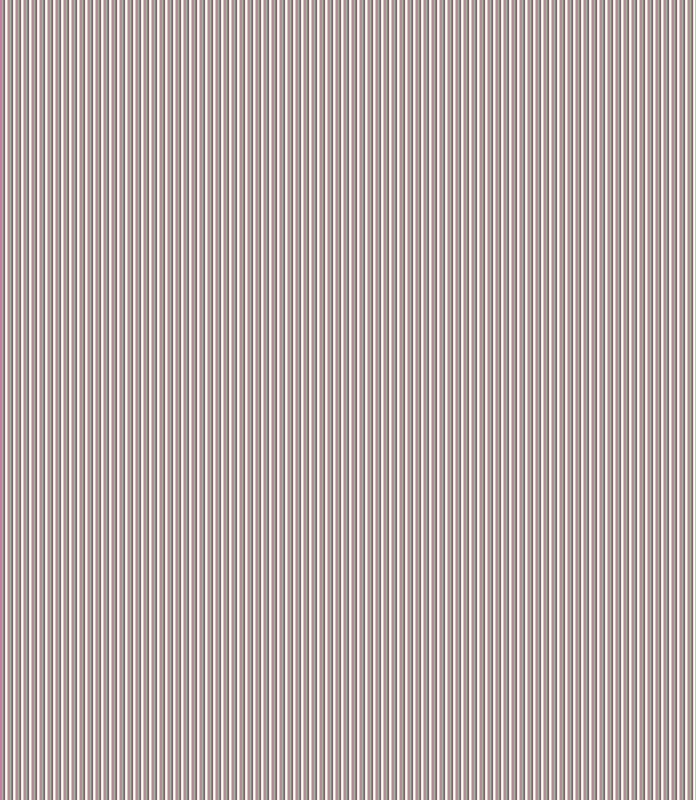

In [ ]:
network_plot(df_group_by, 'Bitcoin transaction network of elements not the central strongly connected component', False)

#### Conclusion

In our graph analysis approach, we address the challenge of analyzing massive graphs that are too large to be directly processed or comprehended. To overcome this obstacle, we employ a segmentation strategy that involves the removal of the central strongly connected component of the graph. By eliminating this densely interconnected core, we simplify the overall graph structure, enabling more efficient analysis. As a result of this segmentation process, we have identified four main actors who appear to be key players in the network. These actors serve as central hubs, with the majority of trading chains in the system pointing towards them. This refined graph representation allows us to better understand the dynamics and relationships within the network, and subsequently, to develop targeted strategies for optimization or intervention.

#### Graph Explanation
- Color scale : number of node connections, the higher the more blue it is
- Edge scale : total value traded using that link, the higher the wider

We want to check if top 100 actors are all part of the giant strongly connected components.

In [ ]:
df_actors.identity.isin(df_network_central_comp_removed).any()

False

All the top 100 actors are part of the main component, as we could expect.

In [ ]:
network = nx.from_pandas_edgelist(df_group_by, source="Source", target="Target", edge_attr="value", create_using=nx.DiGraph)
node_text = list(network.nodes())
node_adjacency = [len(adjacency[1]) for adjacency in network.to_undirected().adjacency()]
actors_connected = pd.DataFrame({'connect_node':node_adjacency}, index=node_text)

We identify a few central actors that are target of all the other actors.

This central nodes are:
- 29
- 9
- LocalBitcoins.com
- Cubits.com

In [ ]:
actors_connected.value_counts()

connect_node
1               52
2               38
4               11
3                8
7                2
5                1
6                1
9                1
12               1
18               1
21               1
41               1
48               1
Name: count, dtype: int64

In [ ]:
actors_connected[actors_connected.connect_node > 15]

,connect_node
LocalBitcoins.com,48
29,41
Cubits.com,18
9,21


In our part, we are focusing into actor-focused networks to gain insights into the reasons behind their emergence as significant components within the main actors' sphere of influence. By examining the individual actors' characteristics, behaviors, and relationships, we aim to uncover the underlying factors that contribute to their central role in the network. By understanding the nature of these actor-focused networks, we can better comprehend the reasons that result in their integration into the larger network structure.

In [ ]:
def path_exist(graph : nx.Graph, source : str, dest : str) -> bool:
    """
    Check if a path exist between two nodes
    :param graph: Graph to check
    :param source: source node
    :param dest: destination node
    :return: return True if a path exist, False otherwise
    """
    try:
        nx.shortest_path(graph, source, dest)
        return True
    except:
        return False


def network_of_actor(df : pd.DataFrame, actor : str) -> pd.DataFrame:
    """
    Extract the part of the network that is related to the actor
    :param df: dataframe of the network
    :param actor: the actor where we want to find the network
    :return: part of the dataframe that is related to the actor
    """
    graph = nx.from_pandas_edgelist(df, source="Source", target="Target", edge_attr="value", create_using=nx.DiGraph)
    
    return df[df.Source.apply(lambda x: path_exist(graph, x, actor))]

### $IV.C.$ Further Graph Explanation
- Node shape
    - Diamond : start node (no parent nodes)
    - Circle : intermediate node (as parent nodes and child nodes)
    - Square : end node (no child node)

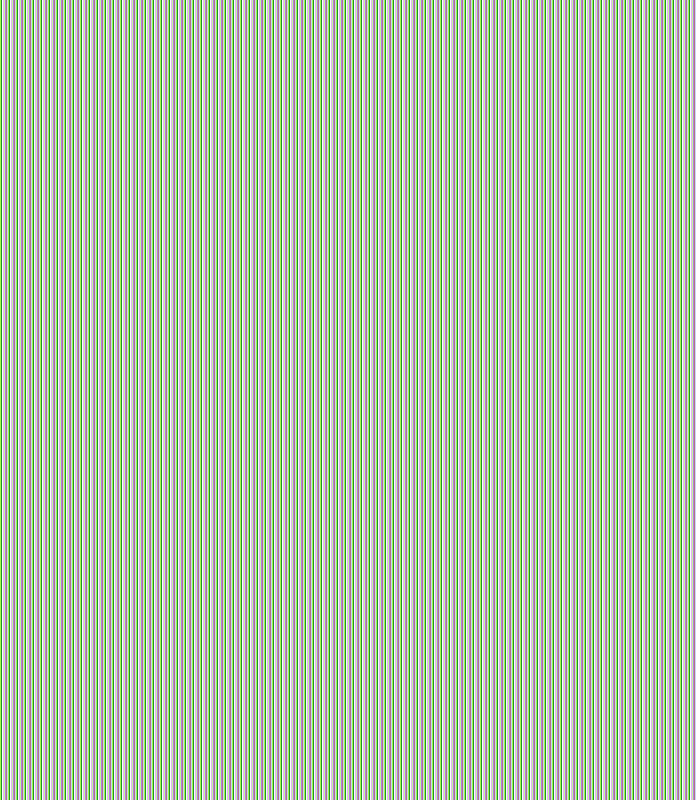

In [ ]:
network_plot(network_of_actor(df_group_by, "29"), "29 network", True)

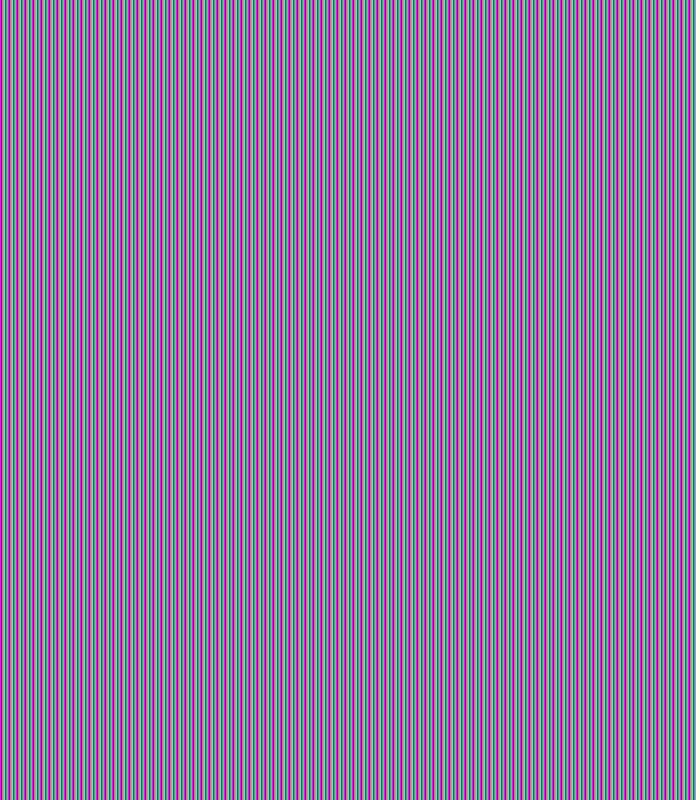

In [ ]:
network_plot(network_of_actor(df_group_by, "9"), "9 network", True)

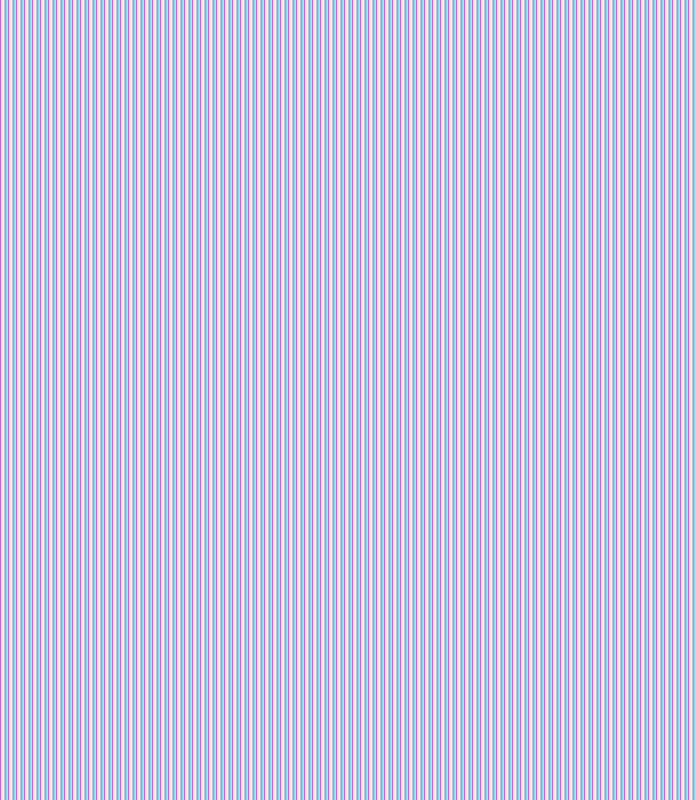

In [ ]:
network_plot(network_of_actor(df_group_by, "LocalBitcoins.com"), "LocalBitcoins.com network", True)

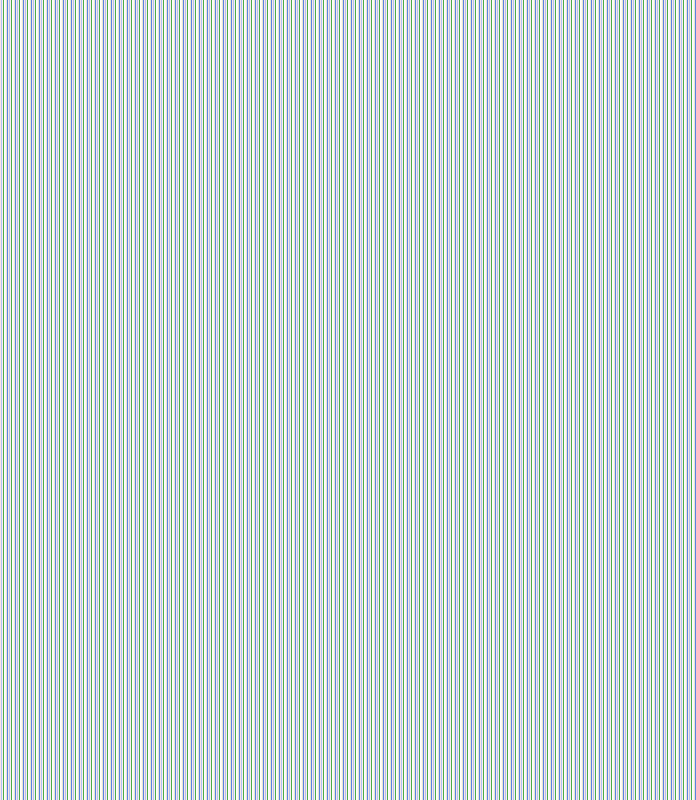

In [ ]:
network_plot(network_of_actor(df_group_by, "Cubits.com"), "Cubits.com network", True)

Upon analyzing an isolated section of the transaction graph, we have discovered that the four main actors serve as common transaction targets within the network. The majority of diagrams reveal only a few endpoints, primarily consisting of these four actors. Additionally, there is a significant number of source nodes initiating transactions directed towards these few endpoints. Based on these findings, we propose two hypotheses:

 - LocalBitcoins.com, one of the four main actors, is a well-known peer-to-peer Bitcoin trading platform that enables transactions between users. Its prominence in the isolated graph may be related to its involvement in money laundering scandals during 2014, 2016, and 2018. This connection could have led to a pattern of transactions primarily targeting the platform.
 Further information can be found in https://www.businessinsider.com/localbitcoinscom-targeted-by-feds-2014-2?r=US&IR=T

 - The four main actors could potentially be operating as a single entity, using multiple addresses as proxies. This hypothesis is driven by the observation that they consistently share the same few target transaction actors. If this is the case, it would indicate a more centralized control over the transaction flow in this part of the network.

### $IV.D.$ Behavioral and Pattern Recognition

In our graph analysis, we initially focused on components of size 1 and successfully removed the central strongly connected component to simplify the network structure. We now shift our attention to studying the three components of size 2, which represent a small fraction of the overall network. By examining these relatively rare components, we aim to uncover patterns and trends that may not be immediately evident in the larger network.

In [ ]:
print(f"The components of size 2 are {comp_size_two}")

The components of size 2 are [['71554878', '72183338'], ['73336371', '69775474'], ['257034', '222027']]


In order to analyze and understand the behavior of actors within the network, we have developed a function that compares the activity patterns of two distinct actors.

In [ ]:
def compare_actor(actor1 : str, actor2 : str) -> None:
    """
    Compare the values send and received with 4 subplots that show the values send and received by the two actors over time
    :param actor1: Name of the first actor
    :param actor2: Name of the second actor
    :return: None but plot the graph
    """
    fig = make_subplots(rows=4, cols=1, x_title="Date", shared_xaxes=True, shared_yaxes='all', subplot_titles=[actor1 + '\'s values send over time', actor2 + '\'s values send over time', actor1 + '\'s values received over time', actor2 + '\'s values received over time'])

    fig.add_trace(
        go.Bar(x=df_network[df_network.Source == actor1].index, y=df_network[df_network.Source == actor1].value, name=actor1),
        row=1, col=1
    )

    fig.add_trace(
        go.Bar(x=df_network[df_network.Source == actor2].index, y=df_network[df_network.Source == actor2].value, name=actor2),
        row=4, col=1
    )

    fig.add_trace(
        go.Bar(x=df_network[df_network.Target == actor1].index, y=df_network[df_network.Target == actor1].value, name=actor1),
        row=2, col=1
    )

    fig.add_trace(
        go.Bar(x=df_network[df_network.Target == actor2].index, y=df_network[df_network.Target == actor2].value, name=actor2),
        row=3, col=1
    )

    
    fig['layout'].update(height=1000, title='Plots of value send on received')

    fig.show()

### $IV.E.$ Two Sized Components Analysis

Now we will dive into the 2 sized components transactions analysis.

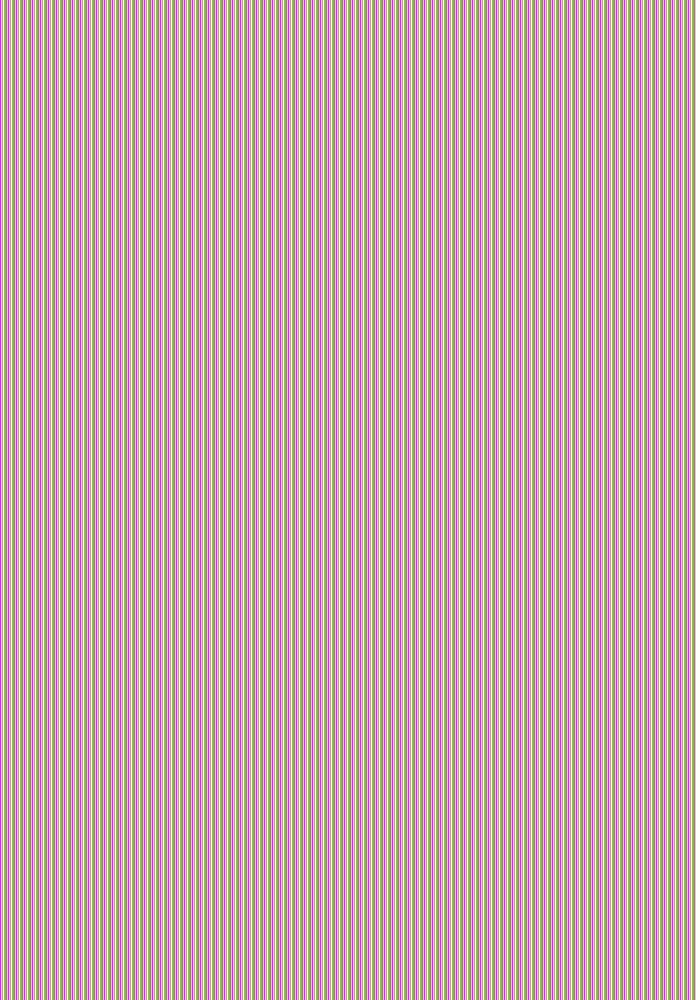

In [ ]:
compare_actor('73336371', '69775474')

Specific pattern can be observed between the send and received graph. We want to take a look at their relationship with other actors.

In [ ]:
df_network[df_network.Source == '73336371'].Target.value_counts()

Target
BitPay.com    81
69775474       1
Name: count, dtype: Int64

In [ ]:
df_network[df_network.Source == '69775474'].Target.value_counts()

Target
73336371      176
BitPay.com      1
Name: count, dtype: Int64

A suspicious fact is that they always interact in the same way and regularly.

Upon analyzing the network and the interactions between the various actors, we have observed that the actor identified as 69775474 appears to function as a distinct interface to the Bitcoin exchange website BitPay.com. This connection becomes evident through the specific patterns of transactions and interactions involving 69775474, which consistently align with the expected activities and services provided by BitPay.com.

We decied to repeat the same analysis for the other components.

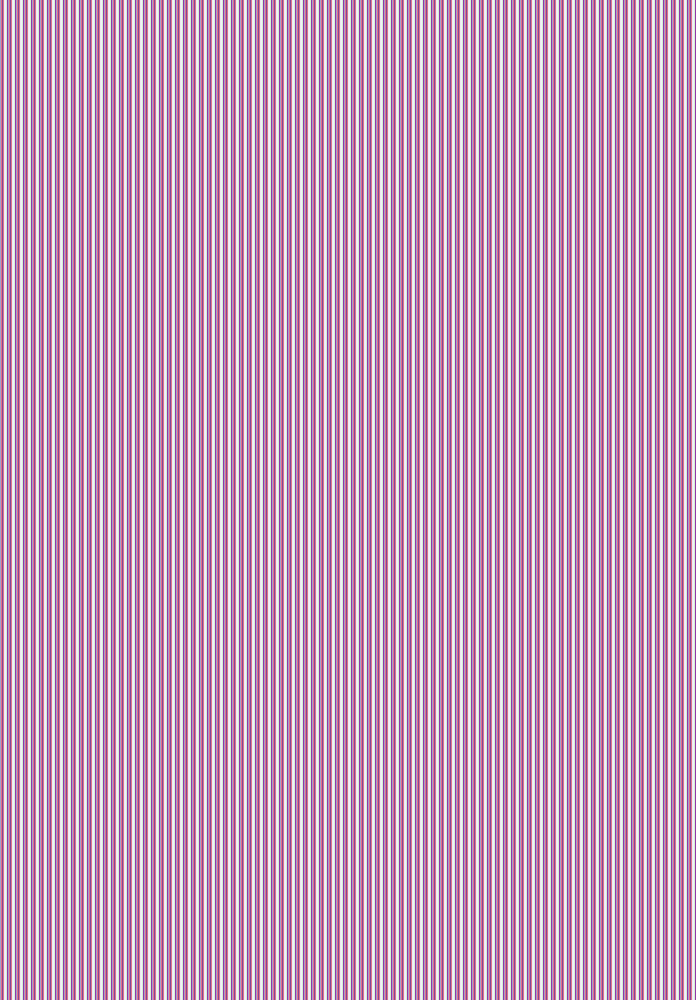

In [ ]:
compare_actor('257034', '222027')

In [ ]:
df_network[df_network.Source == '222027'].Target.value_counts()

Target
257034              19
BitPay.com           3
CoinPayments.net     1
0                    1
Name: count, dtype: Int64

In [ ]:
df_network[df_network.Source == '257034'].Target.value_counts()

Target
222027        8
BitPay.com    6
29            1
491           1
0             1
Name: count, dtype: Int64

Since January 2017 same pattern can be identified than previous component. It seems also to act as an interface to Bitpay.com, but with less certitude than for the previous one.

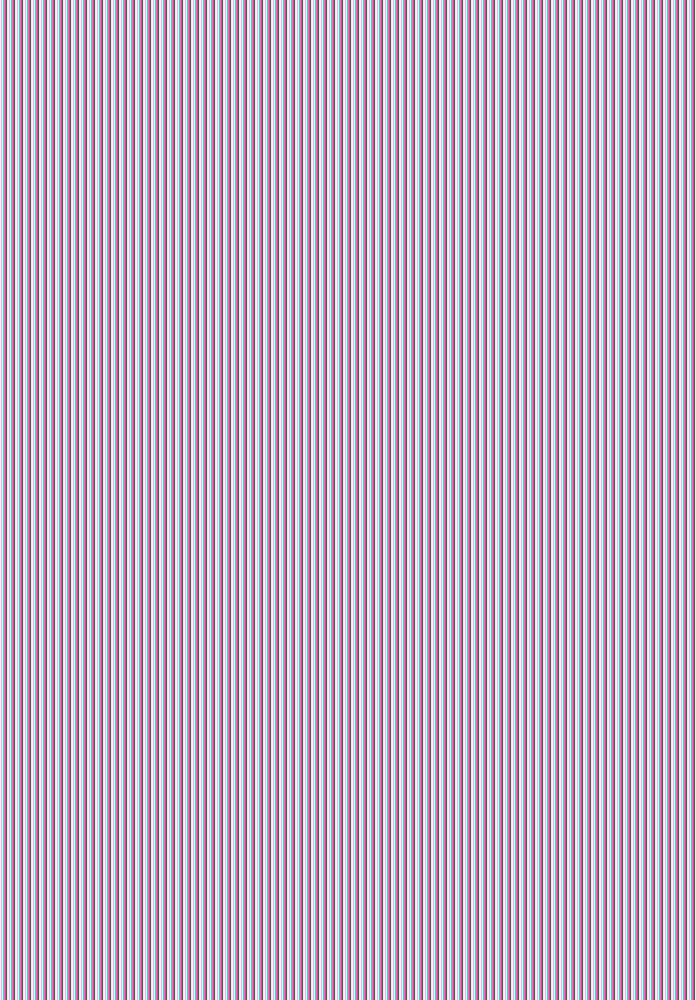

In [ ]:
compare_actor('71554878', '72183338')

In [ ]:
df_network[df_network.Source == '71554878'].Target.value_counts()

Target
72183338    64
Name: count, dtype: Int64

In [ ]:
df_network[df_network.Source == '72183338'].Target.value_counts()

Target
71554878    60
Name: count, dtype: Int64

In this analysis, we have identified an intriguing two-sized network, consisting of only two actors who exclusively exchange transactions between themselves. This unique and isolated interaction pattern may indicate a private arrangement or a closed-loop system between the two parties. The transactions could potentially represent recurring payments, settlements, or even asset transfers between two entities with a strong connection or a shared objective. Another possibility is that these actors are maintaining a secure channel for conducting transactions away from the scrutiny of the larger network. Remarkably, this is the only other self-sustainable network within the larger system.

## $V.$ Conclusion

To put it in a nutshell, the pattern analysis can be quite a difficult task, but we managed to identify a few relationships between actors regardless thanks to removal of the center strongly connected component.

We also created graphs to represent the relationships between all the components of size 1, and showed that most of them are related to 4 actors. Besides that, we provided an analysis of Bitcoin flow chains (start, transversal and end nodes).

Last be not least, we identify two types of actor behaviors, with a higher level of confidence. We found behaviors like actors that act like proxies and a unique isolated self sustained network.